In [1]:
from load_dataset import load_german_credit_dataset, load_diabetes_dataset
from model_manager import PytorchModelManager
from cf_engine.engine import CFEnginePytorch
from cf_engine.counterfactual import CounterfactualExampleBySubset

In [2]:
import numpy as mp
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [3]:
dataset = load_diabetes_dataset()
mm = PytorchModelManager(dataset)
dm = mm.get_dir_manager()
try:
    mm.load_model()
except FileNotFoundError:
    mm.train()
    mm.save_model()
# mm.train()
engine = CFEnginePytorch(mm, dataset)

In [4]:
dataset.get_columns()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome_0',
 'Outcome_1']

In [5]:
subset = {'Glucose': {'max': 82, 'min': 0}, 'Age': {'max': 50, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)

In [6]:
target_name = dataset.get_target_names(False)
pre_target_name = '{}_pred'.format(target_name)
desc = dataset.get_description()
neg = desc[target_name]['category'][0]
pos = desc[target_name]['category'][1]
def plot_subset_cf(subset_attr_cf):
    for i, (feature, subset_cf) in enumerate(subset_attr_cf.items()):
        cf_df = subset_cf.get_cf().reset_index(drop=True)
        original_df = subset_cf.get_instance().reset_index(drop=True)
#         valid_index = cf_df[pre_target_name] != \
#             original_df.loc[cf_df['OriginIndex'], pre_target_name]
#         valid_cf = cf_df.loc[valid_index, :]
#         valid_instance = original_df.loc[valid_cf['OriginIndex'], :]
        valid_index = cf_df[pre_target_name] != original_df[pre_target_name]
        valid_cf = cf_df[valid_index]
        valid_instance = original_df[valid_index]
        pos_valid_cf_attr_value = valid_cf[valid_cf[pre_target_name] == pos][feature]
        neg_valid_cf_attr_value = valid_cf[valid_cf[pre_target_name] == neg][feature]
        pos_valid_instance_attr_value = valid_instance[valid_instance[pre_target_name] == pos][feature]
        neg_valid_instance_attr_value = valid_instance[valid_instance[pre_target_name] == neg][feature]
        # add subplots
        plt.subplot(len(subset_attr_cf), 2, i*2+1)
        plt.hist(neg_valid_instance_attr_value, bins=25, alpha=0.5, label='neg', color='b')
        plt.hist(pos_valid_cf_attr_value, bins=25, alpha=0.5, label='pos', color='r')
        plt.legend(loc='upper right')
        plt.title('{}: neg->pos'.format(feature))
        plt.subplot(len(subset_attr_cf), 2, i*2+2)
        plt.hist(pos_valid_instance_attr_value, bins=25, alpha=0.5, label='pos', color='r')
        plt.hist(neg_valid_cf_attr_value, bins=25, alpha=0.5, label='neg', color='b')
        plt.legend(loc='upper right')
        plt.title('{}: pos->neg'.format(feature))
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

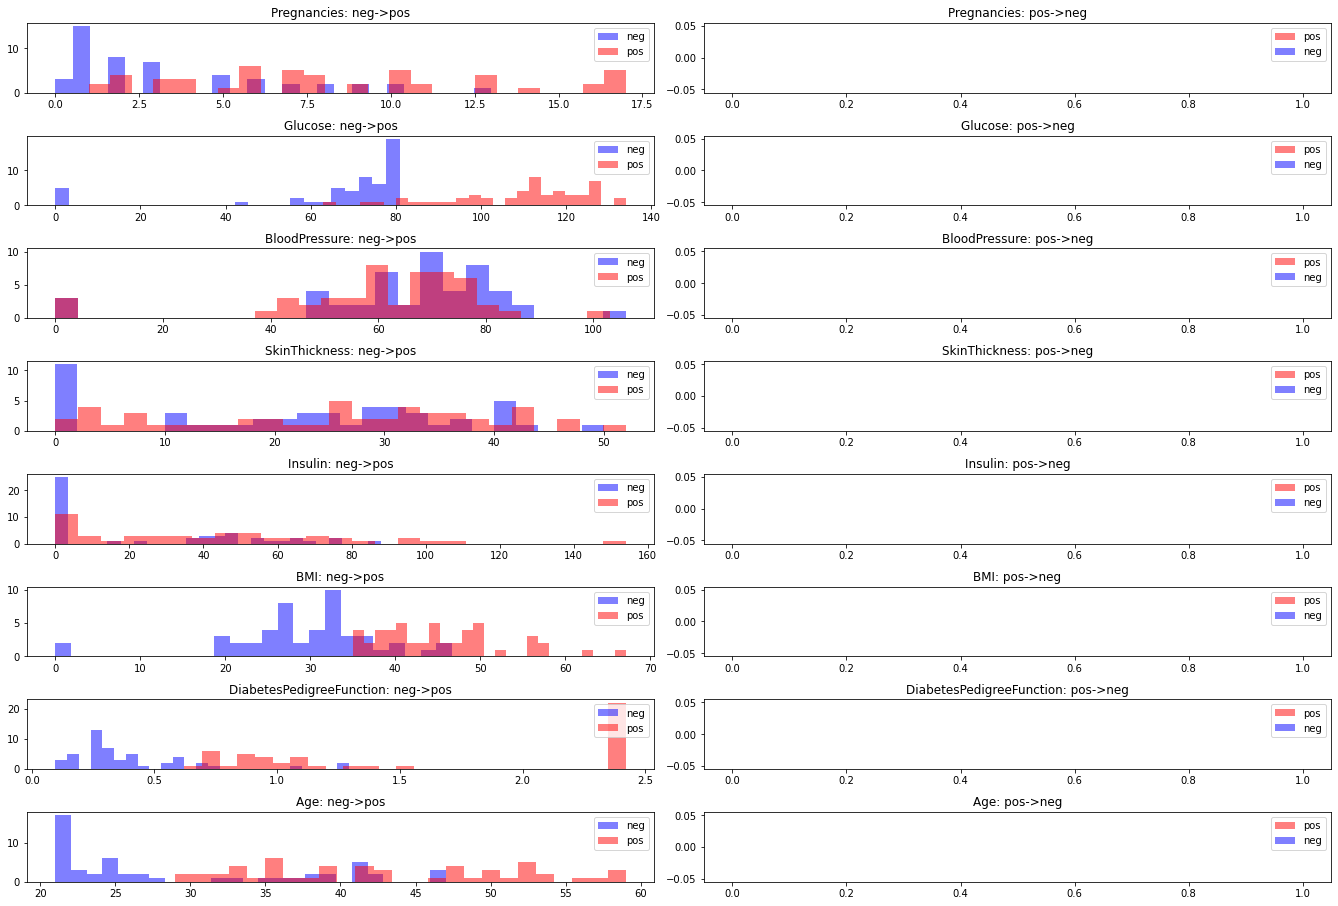

In [7]:
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

In [8]:
subset_attr_cf['Glucose'].get_cf()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score,OriginIndex
0,9.0,118.0,50.0,32.0,129.0,39.3,0.424,34.0,1,1,0.512148,6
1,10.0,111.0,69.0,27.0,1.0,37.2,0.871,28.0,1,1,0.536666,47
2,6.0,126.0,46.0,10.0,0.0,32.1,0.470,31.0,1,1,0.523350,55
3,2.0,99.0,61.0,9.0,2.0,38.3,0.892,50.0,1,1,0.502775,62
4,14.0,111.0,77.0,31.0,6.0,36.5,0.726,28.0,1,1,0.520835,74
5,11.0,87.0,48.0,27.0,19.0,42.5,0.789,41.0,1,1,0.527127,75
6,11.0,97.0,78.0,3.0,30.0,41.2,0.787,50.0,1,1,0.532696,76
7,2.0,132.0,0.0,1.0,0.0,20.8,0.538,34.0,1,1,0.522640,81
8,2.0,125.0,48.0,3.0,0.0,34.0,0.558,35.0,1,1,0.556193,90
9,11.0,99.0,82.0,46.0,66.0,50.6,0.506,44.0,1,1,0.503416,92


In [9]:
# subset = {'Glucose': {'max': 57, 'min': 0}, 'Age': {'max': 50, 'min': 0}}
# subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
# fig = plt.gcf()
# fig.set_size_inches(18.5, 12.5)
# plot_subset_cf(subset_attr_cf)

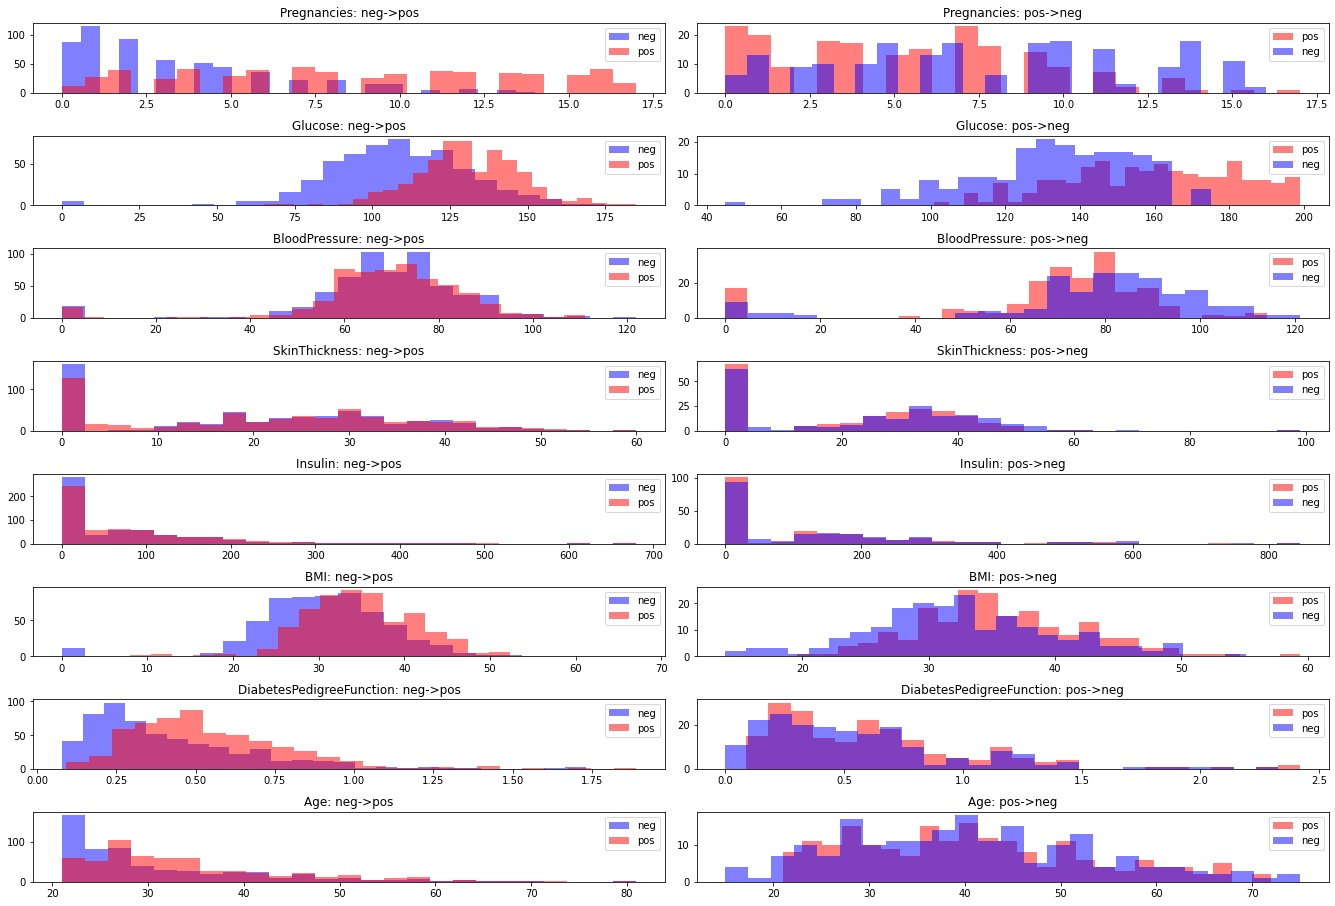

In [10]:
subset = {}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

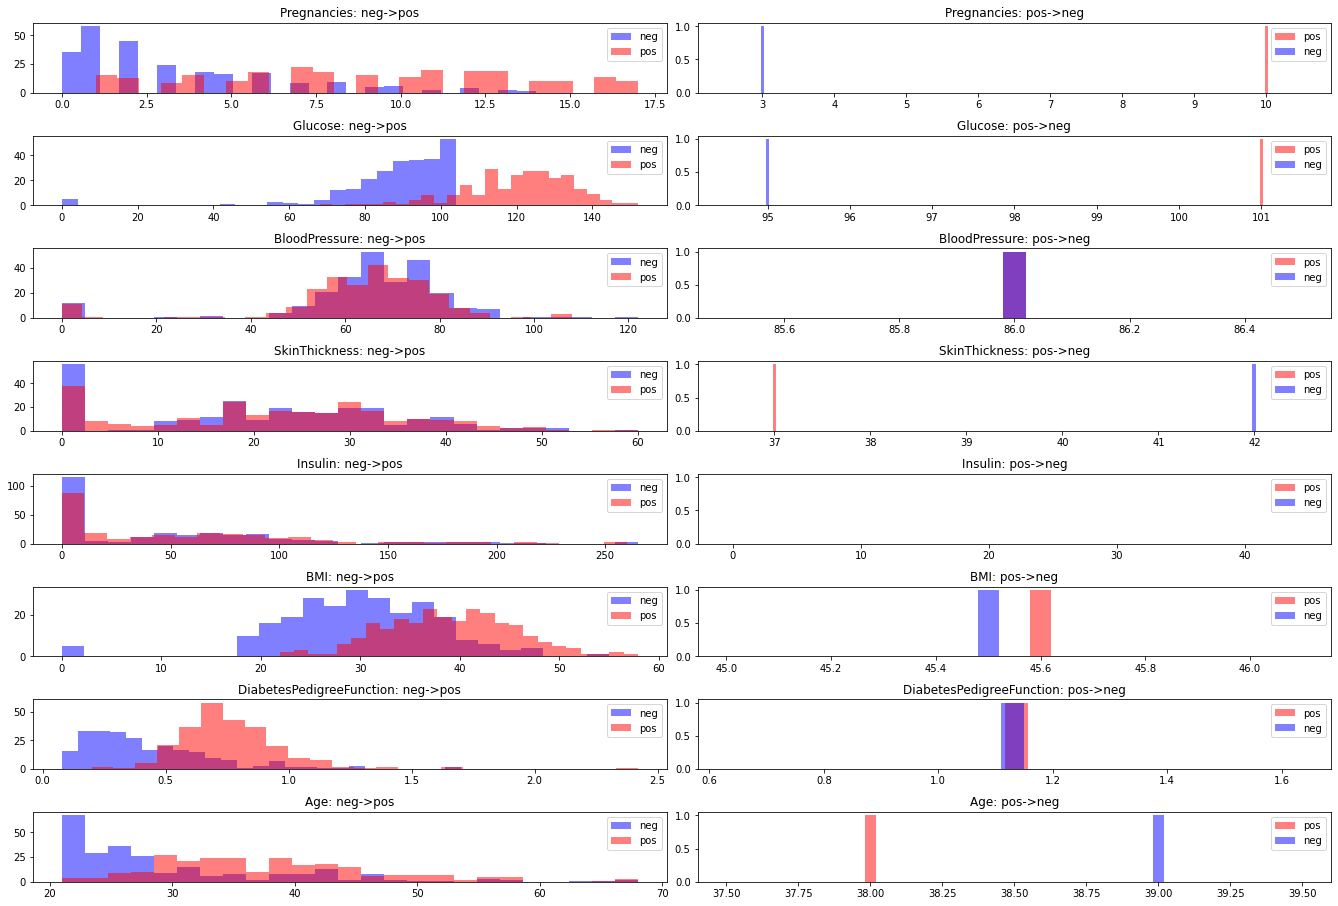

In [11]:
subset = {'Glucose': {'max': 105, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

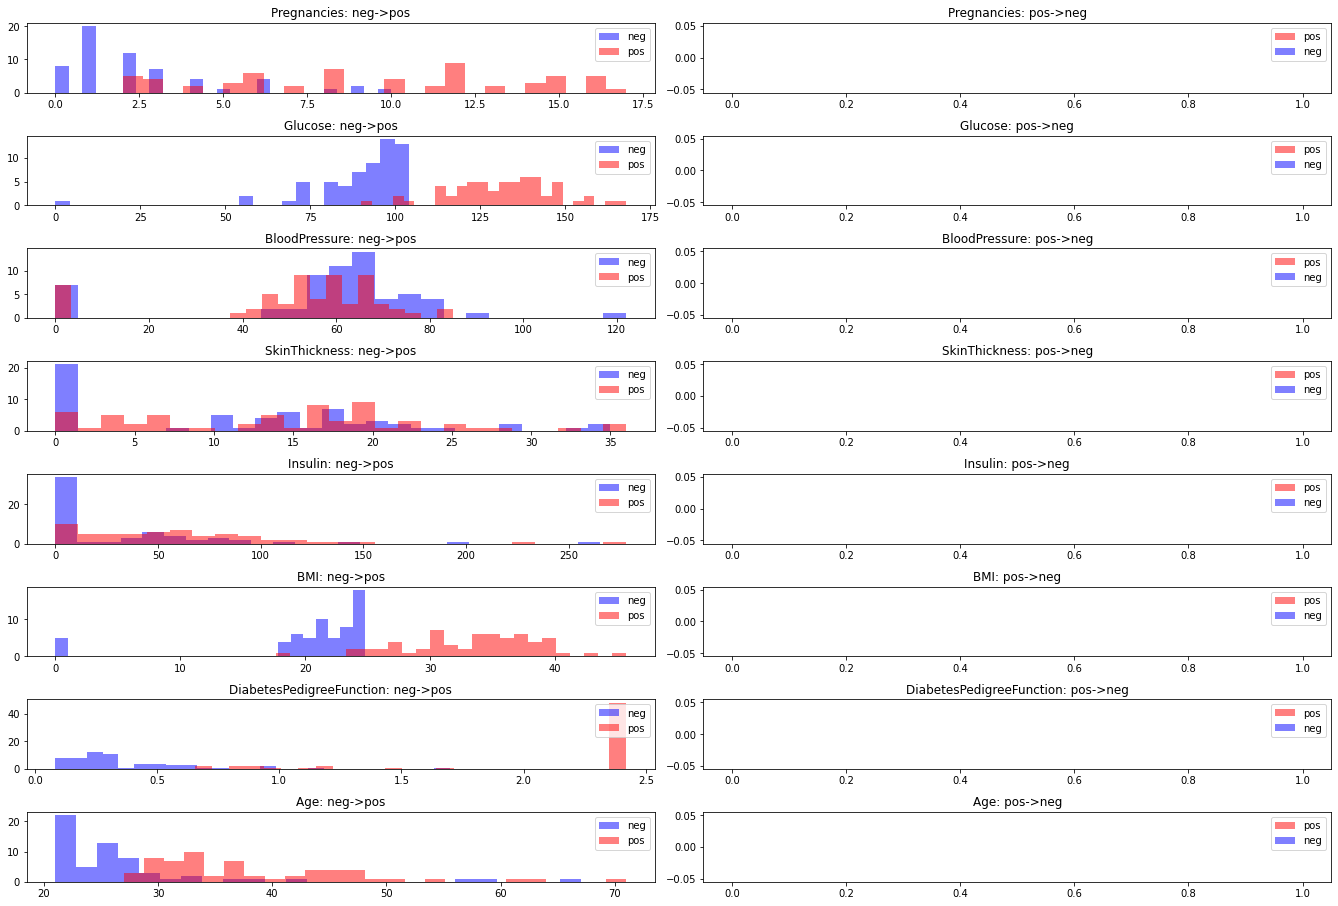

In [12]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[61/61]  Epoch-0, time cost: 0.707s, loss: 0.628, iteration: 433, validation rate: 0.984
Total time cost: 0.811, validation rate: 0.984, average distance: 1.361, average loss: 0.628
[61/61]  Epoch-0, time cost: 0.573s, loss: 0.557, iteration: 330, validation rate: 1.000
Total time cost: 0.622, validation rate: 1.000, average distance: 0.916, average loss: 0.557
[61/61]  Epoch-0, time cost: 0.898s, loss: 0.606, iteration: 607, validation rate: 0.984
Total time cost: 0.946, validation rate: 0.984, average distance: 1.159, average loss: 0.606
[61/61]  Epoch-0, time cost: 0.905s, loss: 0.616, iteration: 621, validation rate: 1.000
Total time cost: 0.950, validation rate: 1.000, average distance: 1.183, average loss: 0.616
[61/61]  Epoch-0, time cost: 1.156s, loss: 0.613, iteration: 868, validation rate: 1.000
Total time cost: 1.204, validation rate: 1.000, average distance: 1.118, average loss: 0.613
[61/61]  Epoch-0, time cost: 0.848s, loss: 0.566, iteration: 599, validation rate: 1.000
T

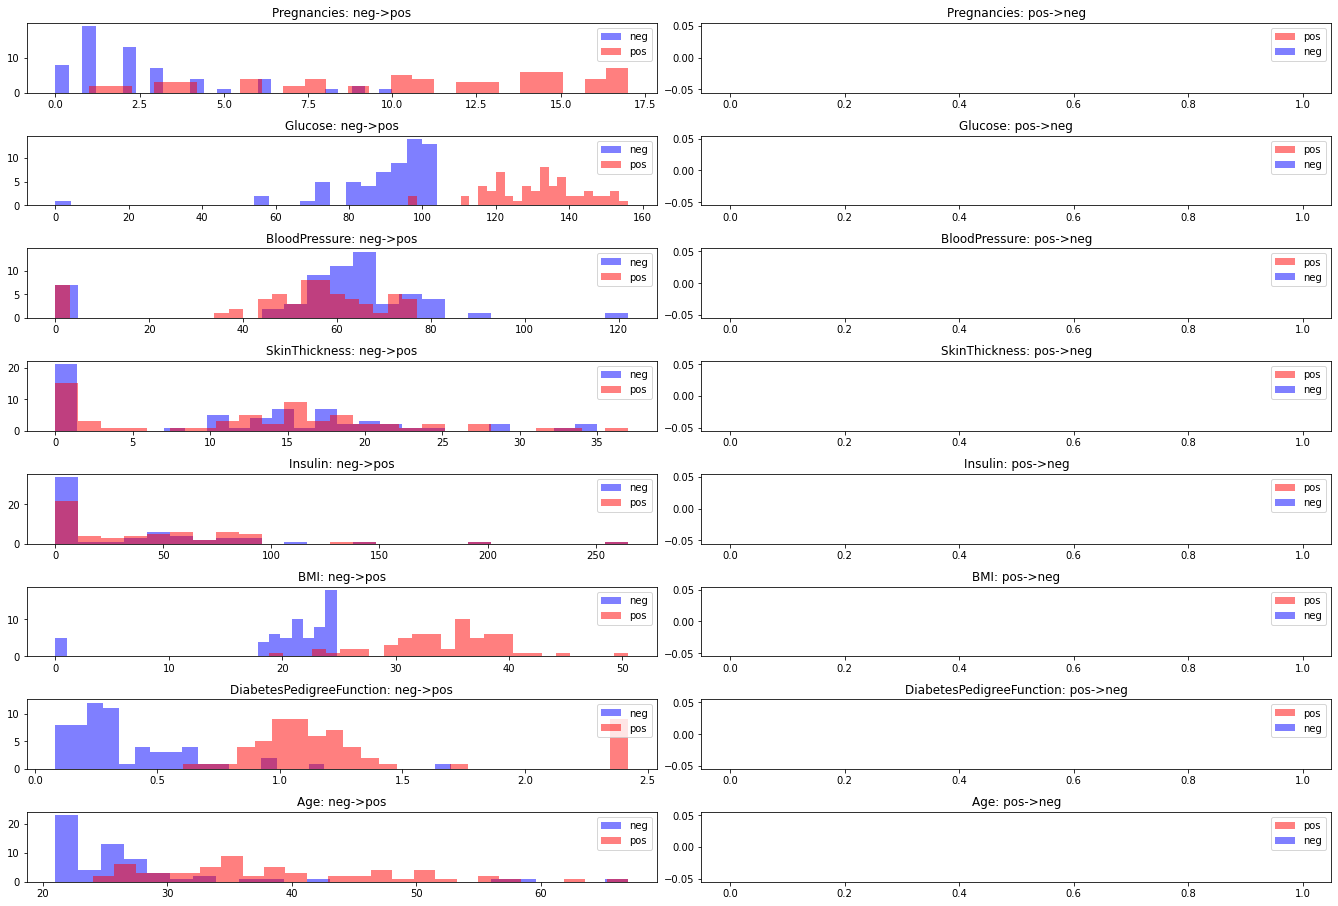

In [13]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10, use_cache=False)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

[50/50]  Epoch-0, time cost: 1.138s, loss: 0.516, iteration: 845, validation rate: 0.980
Total time cost: 1.183, validation rate: 0.980, average distance: 1.218, average loss: 0.516
[50/50]  Epoch-0, time cost: 0.640s, loss: 0.454, iteration: 435, validation rate: 1.000
Total time cost: 0.685, validation rate: 1.000, average distance: 0.912, average loss: 0.454
[50/50]  Epoch-0, time cost: 0.712s, loss: 0.516, iteration: 486, validation rate: 0.940
Total time cost: 0.759, validation rate: 0.940, average distance: 1.332, average loss: 0.516
[50/50]  Epoch-0, time cost: 0.994s, loss: 0.519, iteration: 733, validation rate: 0.980
Total time cost: 1.040, validation rate: 0.980, average distance: 1.227, average loss: 0.519
[50/50]  Epoch-0, time cost: 2.331s, loss: 0.516, iteration: 2000, validation rate: 1.000
Total time cost: 2.379, validation rate: 1.000, average distance: 1.046, average loss: 0.516
[50/50]  Epoch-0, time cost: 0.673s, loss: 0.513, iteration: 409, validation rate: 1.000


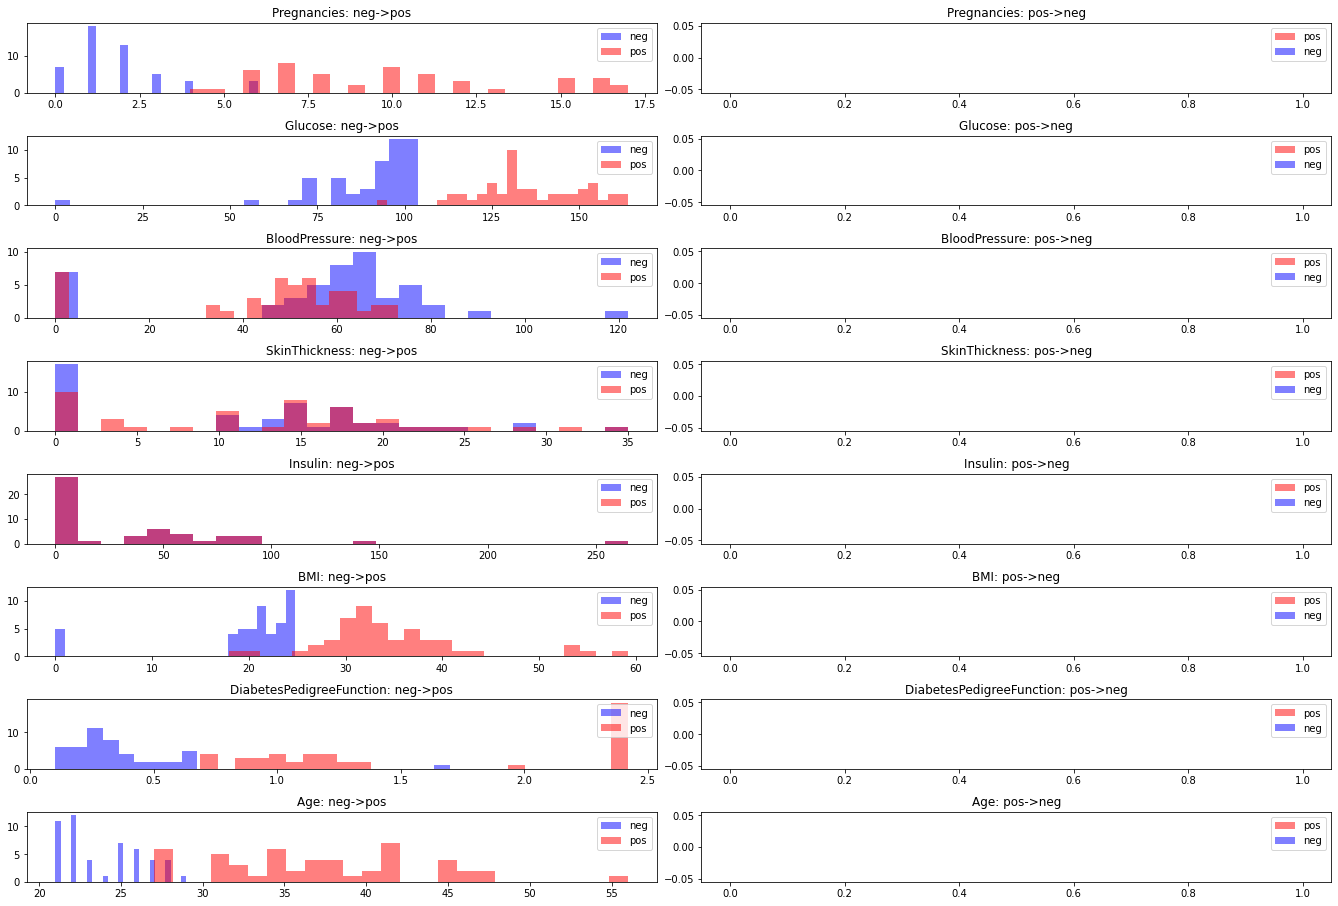

In [16]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}, 'Age': {'max': 30, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

[49/49]  Epoch-0, time cost: 0.593s, loss: 0.524, iteration: 295, validation rate: 0.327
Total time cost: 0.636, validation rate: 0.327, average distance: 1.128, average loss: 0.524
[49/49]  Epoch-0, time cost: 0.980s, loss: 0.421, iteration: 733, validation rate: 1.000
Total time cost: 1.027, validation rate: 1.000, average distance: 0.863, average loss: 0.421
[49/49]  Epoch-0, time cost: 0.853s, loss: 0.507, iteration: 525, validation rate: 0.143
Total time cost: 0.900, validation rate: 0.143, average distance: 1.056, average loss: 0.507
[49/49]  Epoch-0, time cost: 0.642s, loss: 0.516, iteration: 341, validation rate: 0.245
Total time cost: 0.685, validation rate: 0.245, average distance: 1.067, average loss: 0.516
[49/49]  Epoch-0, time cost: 0.640s, loss: 0.506, iteration: 299, validation rate: 0.184
Total time cost: 0.687, validation rate: 0.184, average distance: 1.080, average loss: 0.506
[49/49]  Epoch-0, time cost: 0.514s, loss: 0.513, iteration: 276, validation rate: 0.980
T

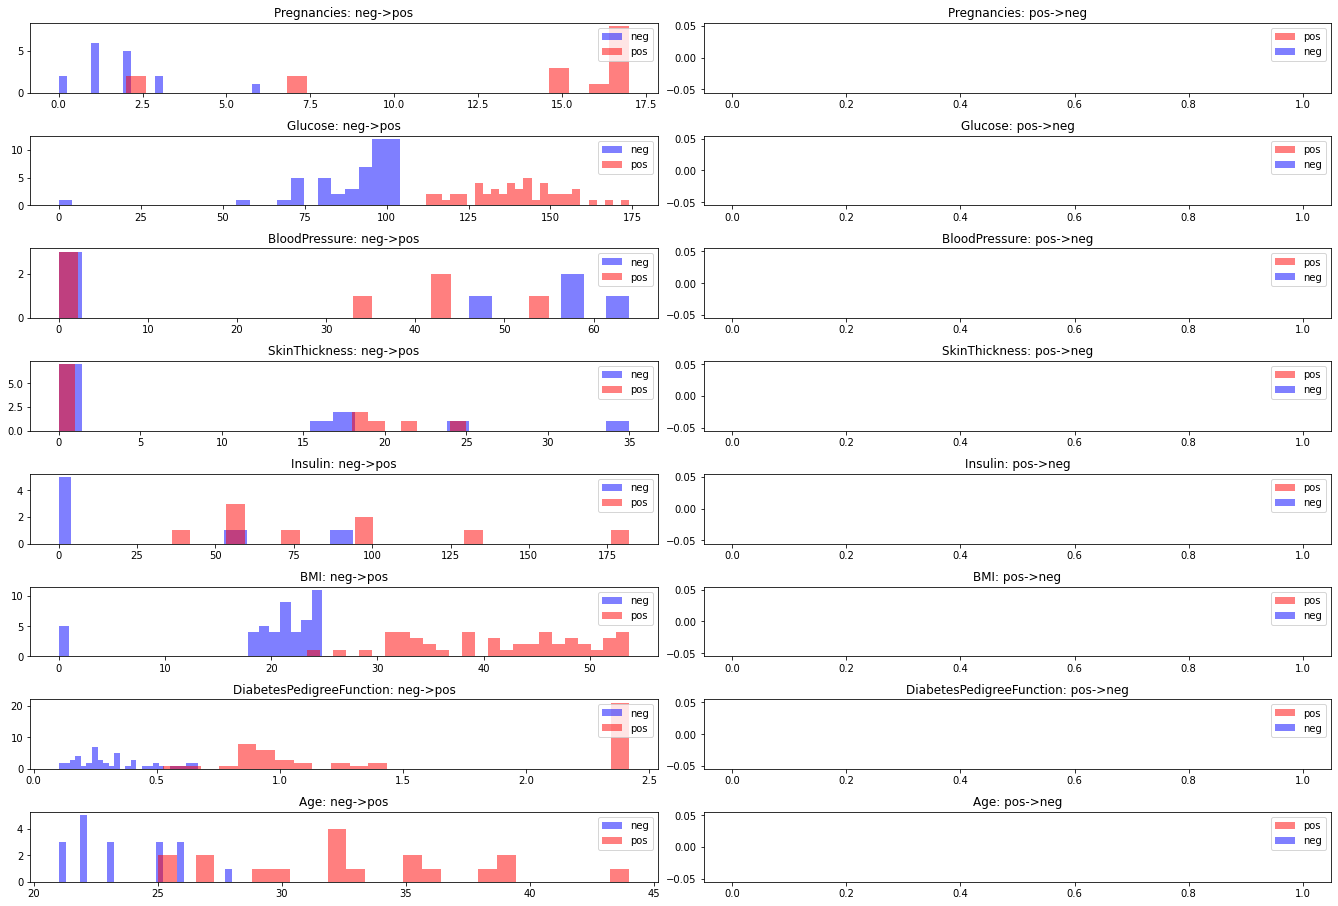

In [17]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}, 
          'Age': {'max': 30, 'min': 0}, 'DiabetesPedigreeFunction': {'max': 0.7, 'min': 0}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

In [25]:
cf = subset_attr_cf['Pregnancies'].get_cf()
cf[cf['Outcome'] == 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score,OriginIndex
4,15.0,105.0,47.0,15.0,100.0,25.0,0.700,30.0,1,1,0.500744,51
7,17.0,105.0,58.0,18.0,99.0,25.0,0.700,30.0,1,1,0.502163,68
8,17.0,104.0,44.0,21.0,65.0,25.0,0.700,30.0,1,1,0.507649,75
9,7.0,105.0,0.0,1.0,12.0,25.0,2.420,30.0,1,1,0.706547,81
12,15.0,105.0,41.0,18.0,124.0,25.0,0.700,30.0,1,1,0.516272,97
24,17.0,105.0,58.0,18.0,97.0,25.0,0.700,30.0,1,1,0.501327,348
29,15.0,105.0,0.0,0.0,42.0,19.9,0.700,25.0,1,1,0.505586,426
30,7.0,105.0,0.0,2.0,54.0,25.0,2.420,27.0,1,1,0.695928,430
32,17.0,105.0,59.0,18.0,110.0,25.0,0.700,30.0,1,1,0.501460,450
34,2.0,105.0,0.0,0.0,30.0,25.0,2.420,30.0,1,1,0.553557,494


In [29]:
data_df = dataset.get_sample(preprocess=False)
data_df[data_df['BloodPressure'] < 5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


/Users/chengfurui/Projects/counterfactuals/env/lib/python3.7/site-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


[41/41]  Epoch-0, time cost: 0.995s, loss: 0.421, iteration: 644, validation rate: 0.195
Total time cost: 1.037, validation rate: 0.195, average distance: 1.066, average loss: 0.421
[41/41]  Epoch-0, time cost: 1.042s, loss: 0.337, iteration: 778, validation rate: 1.000
Total time cost: 1.086, validation rate: 1.000, average distance: 0.824, average loss: 0.337
[41/41]  Epoch-0, time cost: 2.429s, loss: 0.466, iteration: 2000, validation rate: 0.293
Total time cost: 2.473, validation rate: 0.293, average distance: 1.185, average loss: 0.466
[41/41]  Epoch-0, time cost: 0.372s, loss: 0.411, iteration: 149, validation rate: 0.902
Total time cost: 0.415, validation rate: 0.902, average distance: 1.154, average loss: 0.411
[41/41]  Epoch-0, time cost: 0.754s, loss: 0.429, iteration: 514, validation rate: 0.976
Total time cost: 0.798, validation rate: 0.976, average distance: 1.326, average loss: 0.429
[41/41]  Epoch-0, time cost: 2.354s, loss: 0.470, iteration: 1897, validation rate: 0.317

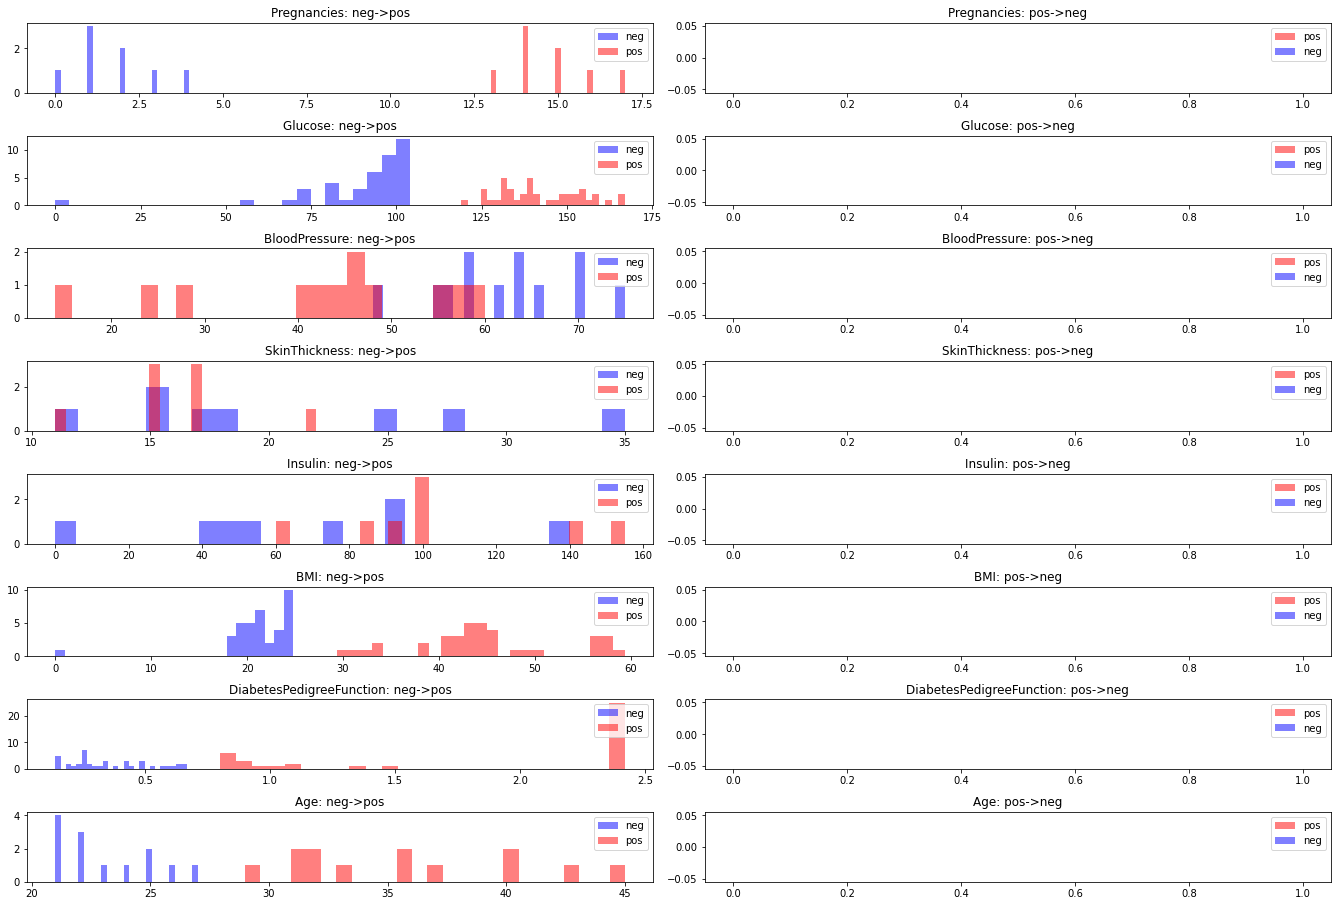

In [30]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}, 
          'Age': {'max': 30, 'min': 0}, 'DiabetesPedigreeFunction': {'max': 0.7, 'min': 0}, 'BloodPressure': {'min': 10, 'max':122}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

In [32]:
subset = {'Glucose': {'max': 105, 'min': 0}, 'BMI': {'max': 25, 'min': 0}, 
          'Age': {'max': 30, 'min': 0}, 'DiabetesPedigreeFunction': {'max': 0.7, 'min': 0}, 'BloodPressure': {'min': 10, 'max':122}}
subset_attr_cf = engine.generate_cfs_subset(subset, batch_size=128, post_step=10)
fig = plt.gcf()
fig.set_size_inches(18.5, 12.5)
plot_subset_cf(subset_attr_cf)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_pred,Score,OriginIndex
1,4.0,105.0,46.0,11.0,51.0,49.2,0.650,30.0,1,1,0.499404,32
2,15.0,105.0,83.0,7.0,49.0,41.6,0.700,30.0,1,1,0.536870,33
3,12.0,105.0,77.0,12.0,82.0,42.0,0.700,30.0,1,1,0.498171,50
4,7.0,105.0,49.0,15.0,36.0,43.9,0.700,30.0,1,1,0.499799,51
5,1.0,105.0,39.0,12.0,0.0,50.4,0.563,30.0,1,1,0.523697,55
6,14.0,105.0,70.0,18.0,64.0,40.9,0.700,30.0,1,1,0.578688,68
7,10.0,95.0,42.0,24.0,47.0,43.1,0.700,30.0,1,1,0.507423,75
8,12.0,105.0,61.0,30.0,66.0,44.4,0.700,28.0,1,1,0.564491,83
9,10.0,105.0,54.0,3.0,16.0,33.7,2.420,30.0,1,1,0.717721,90
10,16.0,105.0,49.0,23.0,98.0,31.7,0.562,28.0,1,1,0.526665,97
